# Monodimensional Angular Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qrobot.models import AngularModel

In this notebook we present a 1-dimensional ($n=1$) demo for the ``AngularModel`` class.

In [2]:
n = 1

Here, we considered a time window of $\tau > 1$.

In [3]:
tau = 30

## Input definition

We start by defining an arbirary input sequence:

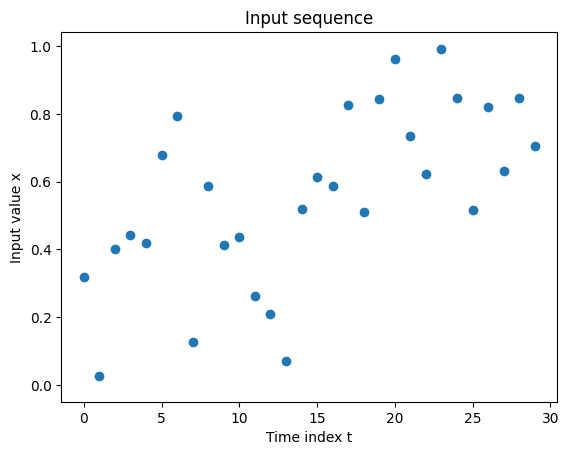

In [4]:
sequence = list()

# Balanced events (between 0 and 1)
for i in range(0, int(tau / 2)):
    sequence.append(np.random.randint(0, 1000) / 1000)

# Unbalanced events (balanced between .5 and 1)
for i in range(int(tau / 2), tau):
    sequence.append(np.random.randint(500, 1000) / 1000)

plt.figure()
plt.stem(sequence, use_line_collection=True, linefmt="w", basefmt="w")
plt.xlabel("Time index t")
plt.ylabel("Input value x")
plt.title("Input sequence")
plt.show()

## Encode the input in the model

We initialize the model by instantiating an object with $n$ and $\tau$

In [5]:
model = AngularModel(n, tau)

Using the ``encode`` method, we can encode each event's data in the model (for multidimensional inputs, a second loop is needed in order to loop through the $n$ dimensions of the input).

In [6]:
model.clear()  # to re-initialize the model (allows re-runing this cell without double the encoding)

for t in range(0, model.tau):  # loop throug the event sequence
    model.encode(sequence[t], dim=0)

The model is implemented by a Qiskit quantum circuit:

In [7]:
model.print_circuit()

     ┌──────────────┐┌────────────┐┌──────────┐┌──────────────┐┌──────────────┐»
q_0: ┤ Ry(0.033406) ├┤ Ry(π/1200) ├┤ Ry(π/75) ├┤ Ry(0.046286) ├┤ Ry(0.043878) ├»
     └──────────────┘└────────────┘└──────────┘└──────────────┘└──────────────┘»
c: 1/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ Ry(0.071209) ├┤ Ry(0.083043) ├┤ Ry(0.013404) ├┤ Ry(0.061575) ├»
«     └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
«c: 1/════════════════════════════════════════════════════════════════»
«                                                                     »
«     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ Ry(0.043145) ├┤ Ry(0.045658) ├┤ Ry(0.027646) ├┤ Ry(0.021782) ├»
«     └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
«c: 1/═════════════

Given the input we defined above, the model is in the following state:

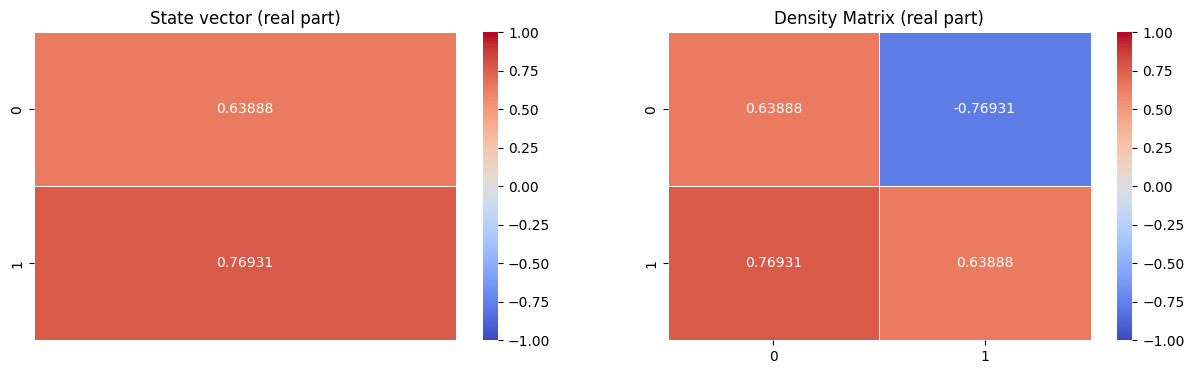

In [8]:
model.plot_state_mat()

**Density matrix** (from [Wikipedia](https://en.wikipedia.org/wiki/Density_matrix)): or a finite-dimensional function space, the most general density operator is of the form

$$\rho =\sum _{j}p_{j}|\psi _{j}\rangle \langle \psi _{j}|$$

where the coefficients $p_{j}$ are non-negative and add up to one, and $|\psi _{j}\rangle \langle \psi _{j}|$ is an outer product written in bra-ket notation. This represents a mixed state, with probability $ p_{j}$ that the system is in the pure state $|\psi _{j}\rangle $.

## Measurement simulation

We simulate ``shots`` measurements, and then we extract the relative frequencies for the two possible basis state outcomes $\lvert 0 \rangle ,\lvert 1 \rangle $.

In [9]:
shots = 1000000
counts = model.measure(shots)

Raw counts for each possible outcome:

In [10]:
import json

print("Aggregated binary outcomes of the circuit:")
print(json.dumps(counts, sort_keys=True, indent=4))

Aggregated binary outcomes of the circuit:
{
    "0": 407070,
    "1": 592930
}


From the raw counts we can obtain the relative frequencies (aka the probabilities) and compare them with the input sequence shape:

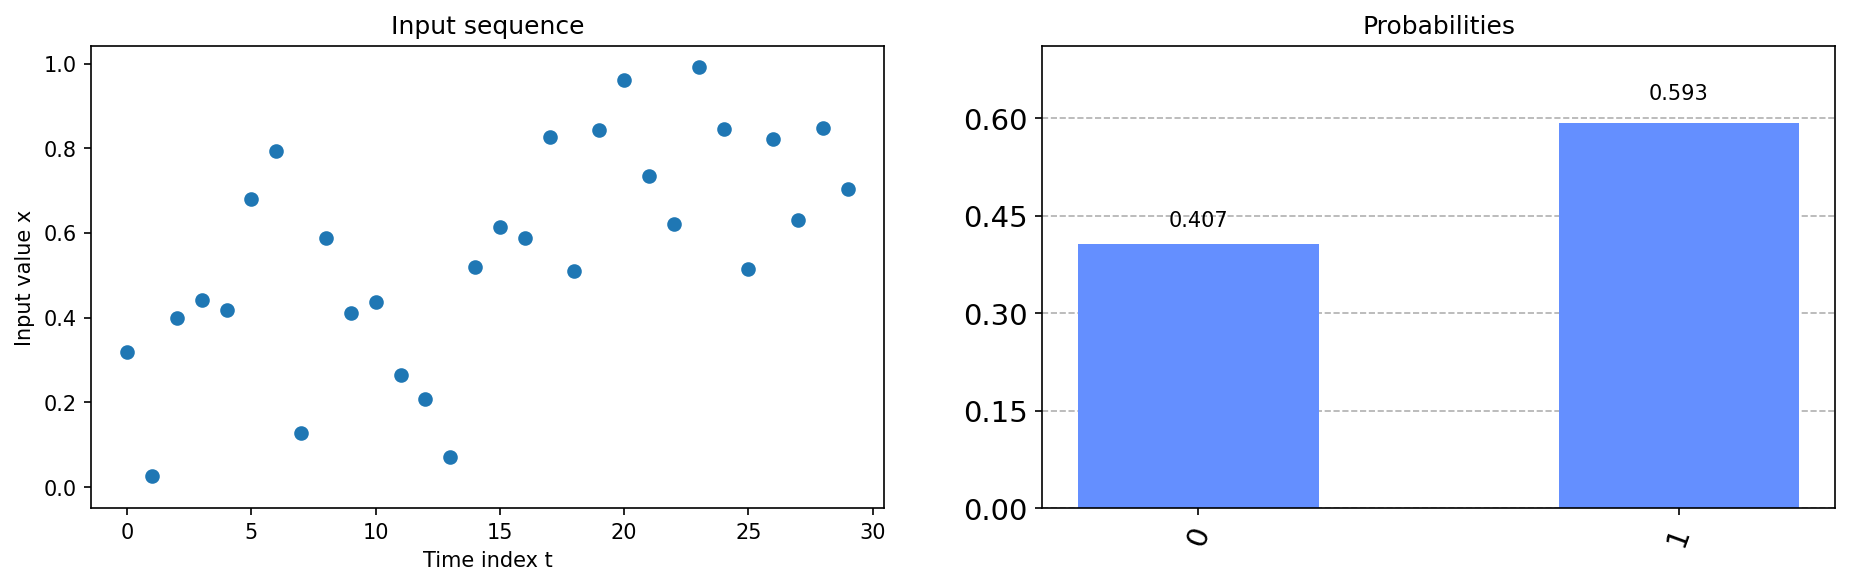

In [11]:
plt.figure(figsize=(15, 4), dpi=150)

ax1 = plt.subplot(1, 2, 1)
ax1.stem(sequence, use_line_collection=True, linefmt="w", basefmt="w")
ax1.set_xlabel("Time index t")
ax1.set_ylabel("Input value x")
ax1.set_title("Input sequence")

ax2 = plt.subplot(1, 2, 2)
plot_histogram(counts, ax=ax2)
ax2.set_ylabel("")
ax2.set_title("Probabilities")

plt.show()

(...)